In [2]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt  # This line was missing

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

Introduction

When studying oligiopolies, one kind of monopolistic competition is called Cournot competition. In the Cournot model firms compete in quantities of output. 

In our assignment we want to analyze what happens, when two firms have an output competition. 
For simplicity, we assume constant MC for both firms. 

The price is determined by the output produced by the two firms together, via the inverse demand function. They choose their output quantity simultaneously. 

Furthermore we are assuming a linear demand curve. 


Missing text

Model description

Missing

Defining the model in python

In [12]:
#Define variables in sympy

p = sm.symbols("p") #Market price
q1 = sm.symbols("q1") #Output firm 1
q2 = sm.symbols("q2") #Output firm 2
c = sm.symbols("c") #Marginal profit
pi1 = sm.symbols("pi1") #Profit for firm 1
pi2 = sm.symbols("pi2") #Profit for firm 2
m = sm.symbols("m") #Parameter for the slope of the price function
b = sm.symbols("b") # Intercept of the price function
C1 = sm.symbols("C1") #Costs for firm 1
C2 = sm.symbols("C2") #Costs for firm 2
P = sm.symbols("P")


#Define cost functions
cost1 = sm.Eq(C1, c*q1) #Costs for firm 1
cost2 = sm.Eq(C2, c*q2) #Costs for firm 2

#Define price function
price_function = sm.Eq(P,m*(q1+q2) + b)

#Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

#Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2


print(profit1)
print(profit2)

b*q1 - c*q1 + m*q1**2 + m*q1*q2
b*q2 - c*q2 + m*q1*q2 + m*q2**2


In Cournot firms seeks to maximize profit. Therefore, we find the best reponse function for the two firms. 

In [48]:
#First order derivative of profit for firm 1 wrt. q1 
objective1 = sm.diff(profit1, q1)

#First order derivative of profit for firm 2 wrt. q2
objective2 = sm.diff(profit2, q2)


display(objective1)
display(objective2)

#To find the best response functions, we isolate q1* and q2*
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

display(BR1)
display(BR2)


b - c + 2*m*q1 + m*q2

b - c + m*q1 + 2*m*q2

(-b + c - m*q2)/(2*m)

(-b + c - m*q1)/(2*m)

A Nash Equilibrium in Cournot is where, both firms use their best reponse function. Graphically, this is where the two best response functions intersect. This is shon below. 

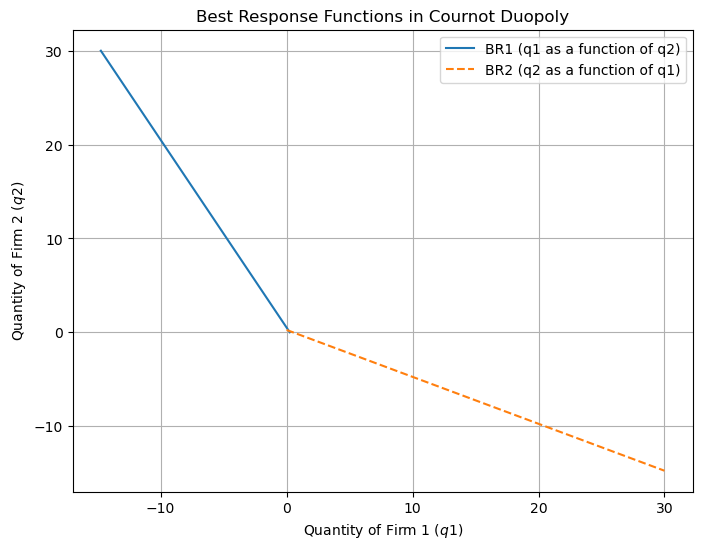

In [37]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

# Define variables
p, q1, q2, c, pi1, pi2, m, b, C1, C2, P = sm.symbols('p q1 q2 c pi1 pi2 m b C1 C2 P')

# Define cost functions
cost1 = sm.Eq(C1, c * q1)  # Costs for firm 1
cost2 = sm.Eq(C2, c * q2)  # Costs for firm 2

# Define price function
price_function = sm.Eq(P, m * (q1 + q2) + b)

# Define profit for firm 1
profit1 = m * q1**2 + m * q1 * q2 + b * q1 - c * q1

# Define profit for firm 2
profit2 = m * q2**2 + m * q1 * q2 + b * q2 - c * q2

# First order derivative of profit for firm 1 wrt. q1
objective1 = sm.diff(profit1, q1)

# First order derivative of profit for firm 2 wrt. q2
objective2 = sm.diff(profit2, q2)

# To find the best response functions, we isolate q1* and q2*
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

# Assume some form of parameter values
m_val, b_val, c_val = 1, 0, 0.5  # Example values for m, b, c

# Lambdify the expressions for numerical computation
BR1_func = sm.lambdify(q2, BR1.subs({m: m_val, b: b_val, c: c_val}), 'numpy')
BR2_func = sm.lambdify(q1, BR2.subs({m: m_val, b: b_val, c: c_val}), 'numpy')

# Define a range for q1 and q2
q_range = np.linspace(0, 30, 400)

# Evaluate best responses
q1_responses = BR1_func(q_range)  # q1 as a function of q2
q2_responses = BR2_func(q_range)  # q2 as a function of q1

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(q1_responses, q_range, label='BR1 (q1 as a function of q2)')
plt.plot(q_range, q2_responses, label='BR2 (q2 as a function of q1)', linestyle='--')
plt.xlabel('Quantity of Firm 1 ($q1$)')
plt.ylabel('Quantity of Firm 2 ($q2$)')
plt.title('Best Response Functions in Cournot Duopoly')
plt.legend()
plt.grid(True)


plt.show()


To find the intersection algebraically, we must find q1* and q2* as functions of c, b, m.

In [49]:
#First, we substitute the expression for q2 into the BR1.

eq1 = BR1.subs(q2,BR2)

#Then we solve for q1

eq2 = sm.solve(eq1, q1)  # isolate price as a variable

display(eq2)


[(b - c)/m]

Similar we find q2*

In [50]:
#First, we substitute the expression for q2 into the BR1.

eq3 = BR1.subs(q1,BR1)

#Then we solve for q1

eq4 = sm.solve(eq3, q2)  # isolate price as a variable

display(eq4)

[(-b + c)/m]

The Cournot equilibium must therefore be: ([c-b/]/m, [c-b]/m)